<br><br><div style="text-align: center"><img width=300px src="http://amaq.lais.huol.ufrn.br/static/img/logo-lais.png"></div>
<br><br><br>
<center>
<h1>Processamento Digital de Imagens para Curiosos :-)</h1>
<h2> **Parte II**: <u><i>Esteganografia</i></u> </h2>
<h2>Escrito por <a href="mailto:mribeirodantas@lais.huol.ufrn.br?Subject=Curso%20PDI" target="_top">Marcel Ribeiro Dantas</a></h2>
<h2>Julho de 2016</h2>
</center><br><br>

# O que é esteganografia?

Esteganografia é uma palavra oriunda do Grego que, traduzida, nos diz algo como "escrita escondida". Tem sido utilizada por mais de 2500 anos nos mais variados contextos de caratér pessoal, militar ou diplomático. Em um <a href="https://www.sans.org/reading-room/whitepapers/stenganography/steganography-past-present-future-552" target="_blank">artigo</a> do Instituto SANS uma revisão é feita onde é abordado o passado, o presente e o futuro da esteganografia em maiores detalhes. Se quiser mais detalhes sobre a história da esteganografia, faça uma pausa e leia o artigo e então volte aqui :-)

A esteganografia é o estudo e uso de técnicas que permitem esconder informações dentro de outras informações, algo como <a href="https://pt.wikipedia.org/wiki/Seguran%C3%A7a_por_obscurantismo" target="_blank">segurança por obscurantismo</a>. Observe, por exemplo, a frase a seguir:
<br>

**<center>Since everyone can read, encoding text in neutral sentences is doubtfully effective</center>**
<br>
Há uma outra mensagem escondida dentro dela. Que tal tentar descobrir? Ao final deste documento você irá encontrar a resposta. É possível que o significado de esteganografia ainda não tenha ficado claro para você. Qual a diferença entre <i>criptografia</i> e esteganografia, por exemplo?

Enquanto que a criptografia oculta o significado da mensagem, a esteganografia oculta a existência desta mensagem. Se você tem uma tabela com informações do seu sistema, é possível que exista em algum lugar uma coluna claramente destinada para armazenar as senhas de seus usuários. Se seu sistema tiver sido bem implementado, nesses campos o que estará armazenado de fato é um texto cifrado, ou seja, nem mesmo os desenvolvedores e administradores tem acesso a senha real dos usuários. Mas eles sabem que uma versão criptografada está lá, exatamente naquela coluna específica da tabela. No caso da esteganografia, oculta-se a existência de que há uma senha ou uma mensagem a ser protegida. É possível, no entanto, combinar ambas as técnicas como a imagem abaixa revela:

<br><div style="text-align: center"><img width=600px src="stego+crypto.png"><br>


Abaixo, há uma mensagem capturada de um espião alemão durante a Segunda Guerra Mundial:

_"Apparently neutral's protest is thoroughly discounted and ignored. Isman hard hit. Blockade issue affects pretext for embargo on by products, ejecting suets and vegetable oils"_

Destacando a segunda letra de cada uma das palavras temos:

"A<font color="red">p</font>parently n<font color="red">e</font>utral's p<font color="red">r</font>otest i<font color="red">s</font> t<font color="red">h</font>oroughly d<font color="red">i</font>scounted a<font color="red">n</font>d i<font color="red">g</font>nored. I<font color="red">s</font>man h<font color="red">a</font>rd h<font color="red">i</font>t. B<font color="red">l</font>ockade i<font color="red">s</font>sue a<font color="red">f</font>fects p<font color="red">r</font>etext f<font color="red">o</font>r e<font color="red">m</font>bargo o<font color="red">n</font> b<font color="red">y</font> p<font color="red">r</font>oducts, e<font color="red">j</font>ecting s<font color="red">u</font>ets a<font color="red">n</font>d v<font color="red">e</font>getable o<font color="red">i</font>ls"

Portanto, nos revelando a mensagem oculta: **Pershing sails from NY June 1**.

Um outro caso interessante segue abaixo:

_"Fishing freshwater bends and saltwater coasts rewards anyone feeling stressed. Resourceful anglers usually find masterful leapers fun and admit swordfish rank overwhelming anyday."_

Destacando a terceira letra de cada uma das palavras temos:

Fi<font color="red">s</font>hing fr<font color="red">e</font>shwater be<font color="red">n</font>ds an<font color="red">d</font> sa<font color="red">l</font>twater co<font color="red">a</font>sts re<font color="red">w</font>ards an<font color="red">y</font>one fe<font color="red">e</font>ling st<font color="red">r</font>essed. Re<font color="red">s</font>ourceful an<font color="red">g</font>lers us<font color="red">u</font>ally fi<font color="red">n</font>d ma<font color="red">s</font>terful le<font color="red">a</font>pers fu<font color="red">n</font> an<font color="red">d</font> ad<font color="red">m</font>it sw<font color="red">o</font>rdfish ra<font color="red">n</font>k ov<font color="red">e</font>rwhelming an<font color="red">y</font>day.

Revelando assim a mensagem oculta: **Send Lawyers, Guns, and Money**
            


# Revisão introdutória de Processamento Digital de Imagens

Caso você não tenha estudado a primeira parte deste material, antes de prosseguir neste módulo é interessante que você leia para compreender a base dos conceitos que permeiam o processamento digital de imagens. Caso já o tenha estudado, algumas imagens do material foram extraídas e copiadas aqui para uma rápida revisão.

<img width=700px src="https://processing.org/tutorials/pixels/imgs/pixelarray.jpg"><center><h6>Fonte: processing.org</h6></center>

<img width=400px src="http://scyllarus.research.nicta.com.au/images/RGBimage300.png"><center><h6>Fonte: http://scyllarus.research.nicta.com.au/</h6></center>

<img width=400px src="http://paulbourke.net/dataformats/bitmaps/colourdepthfig2.gif"><center><h6>Fonte: http://paulbourke.net/</h6></center>

# Escondendo texto em uma imagem

## Onde esconder?

Agora que estamos com os conceitos de PDI refrescados em nossas mentes, que tal esconder uma frase dentro de uma imagem? Antes de lidarmos diretamente com o código e as imagens com as mensagens ocultas, vamos falar um pouco dos números para compreender as limitações de uma das técnicas mais simples.

Um pixel de uma imagem RGB tem uma densidade de cor (color depth) de 24 bits, já que temos 3 canais, R, G e B, cada um com 8 bits. Isso nos permite um total de $2^{24}$ tons de cor ou 16.777.216 tons, conhecido como _True Color_. O olho humano consegue discriminar até 10 milhões de tons o que significa que temos mais do que o necessário. Já pensou se mudássemos alguns detalhes na imagem, não perceptíveis para o olho humano, de modo a esconder informações? Mas como fazer isso?

## No final, bits são escovados

Uma hora ou outra, diminuindo-se o nível de abstração, você irá encontrar bits ou _binary digits_. Zeros e uns. E é assim que as informações são de fato representadas quando se desce muito nas camadas de abstração. Antes de pensarmos em como armazenar nosso segredo dentro de uma imagem, precisamos se preocupar em como transformar nosso segredo em uma representação que pode ser armazenada dentro da imagem. Podemos utilizar a tabela ASCII (American Standard Code for Information Interchange), abaixo, para achar a representação numérica dos caracteres do Português. O **a**, por exemplo, em decimal é 97, enquanto que **A** é 65 e o **z** é 122. A tabela ASCII não é a única representação, nem a mais recente mas isso é um papo para um outro curso.

<img width=700px src="http://www.asciitable.com/index/asciifull.gif"><center><h6>Fonte: http://lookuptables.com/</h6></center>

Desse modo, o primeiro passo é converter cada letra de nossa mensagem para seu correspondente valor decimal e obter então seu correspondente em binário. Em Python, a função _ord_ informa o decimal do carácter informado (string de cumprimento igual a um) . A função _format_, por sua vez, pode converter um decimal para sua representação em binário. Que tal escrevermos um programinha que pega uma frase e nos diz sua representação em binário?

In [12]:
frase = "Estou amando esse curso :-)"

def str2bin(phrase):
    bphrase = []
    for char in phrase:
        bphrase.append(format(ord(char), 'b').zfill(8))
    return bphrase

# Representação mais fácil de ler, com cada byte separado.
print list(frase)

print('\n')
# String separada em caracteres (inclusive, espaço em branco)
print str2bin(frase)

print('\n')

# Representação direta
print ''.join(str2bin(frase))


['E', 's', 't', 'o', 'u', ' ', 'a', 'm', 'a', 'n', 'd', 'o', ' ', 'e', 's', 's', 'e', ' ', 'c', 'u', 'r', 's', 'o', ' ', ':', '-', ')']


['01000101', '01110011', '01110100', '01101111', '01110101', '00100000', '01100001', '01101101', '01100001', '01101110', '01100100', '01101111', '00100000', '01100101', '01110011', '01110011', '01100101', '00100000', '01100011', '01110101', '01110010', '01110011', '01101111', '00100000', '00111010', '00101101', '00101001']


010001010111001101110100011011110111010100100000011000010110110101100001011011100110010001101111001000000110010101110011011100110110010100100000011000110111010101110010011100110110111100100000001110100010110100101001


# Como inserir nossa mensagem na imagem?

Agora que já temos nossos bits, como podemos inserí-los na imagem? Um dos modos mais simples é se aproveitar do bit menos significativo ou LSB (least significant bit) da imagem. Em uma imagem RGB, cada pixel possui três canais de 8 bits cada. Peguemos o exemplo abaixo com três pixels:

<br>
<center>10010101   00001101   11001001</center>
<center>10010110   00001111   11001010</center>
<center>10011111   00010000   11001011</center>

E digamos que queremos esconder os 9 bits a seguir: **101101101**. Aproveitando-se do bit menos significativo, após escondermos esses bits (ou a letra que ele representa) em nossa imagem de três pixels teríamos:

<br>
<center>10010101   0000110**0**   11001001</center>
<center>1001011**1**   0000111**0**   1100101**1**</center>
<center>10011111   00010000   11001011</center>

É possível ver através dos bits em negrito que foi possível armazenar nossos 9 bits, modificando apenas 4 bits, cerca de 50% e, ainda assim, a mudança dificilmente será percebida pelo olho humano. De posse das informações levantadas até agora, já é possível saber o tamanho da mensagem que podemos esconder em uma determinada imagem.

Uma imagem com resolução 800x600, como já foi visto no módulo anterior, tem 480.000 pixels. Em modo RGB, teremos três vezes esse número, já que temos 3 canais, totalizando 1.440.000 bytes. Sabendo que geralmente um caracter é representado como 1 byte, e utilizamos do último bit de cada byte, precisaremos de 8 bytes, dos 1.1440.000 bytes, para representar nosso 1 byte, ou seja, um único caracter. 1.440.000 / 8 nos da 180.000 letras.

A bíblia católica em seu formato atual tem mais de 3.000.000 de letras. Levando em conta que esse levantamento considerou pontuações e espaços em branco, precisaríamos de oito vezes isso em bytes para poder esconder a bíblia em uma imagem, algo como 24.000.000 bytes. Será que é possível? Vejamos!

Podemos utilizar uma imagem no modo RGBA (o canal alpha costuma ser utilizado para representar uma camada de transparência). Isso nos permite ter mais 8 bits por pixel, ou seja, um _color depth_ de 32 bits.

<center>$24.000.000 / 4 = 6.000.000$ pixels</center>

É possível, portanto, esconder a bíblia completa em uma imagem no modo RGBA com resolução aproximada de 2449x2449. Essa imagem ocuparia algo em torno de 22M ou 22 megabytes, já que 24.000.000 de bytes equivalem a mais de 23.000K ou 22 MB.


# Escondendo texto em uma imagem RGBA

Agora que entendemos que os bits menos significativos é onde podemos esconder nossos bits que, juntos, formam nossa mensagem secreta fica claro porque é interessante utilizar modos com a maior quantidade de bpp (bits per pixel) possível, nossa densidade de cor ou color depth. Se estivéssemos falando de imagens monocromáticas, teríamos o tamanho de nossa mensagem bastante limitado.

Uma imagem monocromática com resolução de 800x600 nos da 480.000 pixels ou bytes. Dividindo por 8 temos espaço para esconder até 60.000 letras. Você pode considerar isso bastante, mas é três vezes menos do que uma imagem RGB nos oferece ou 4 vezes menos do que uma RGBA nos oferece.

O código abaixo esconde uma mensagem secreta dentro de uma imagem RGBA. Utiliza-se a técnica ensinada até então mas com uma leve modificação, já que por padrão as funções da biblioteca padrão de imagem do Python nos traz os valores dos canais dos pixels em decimal e não em binário.

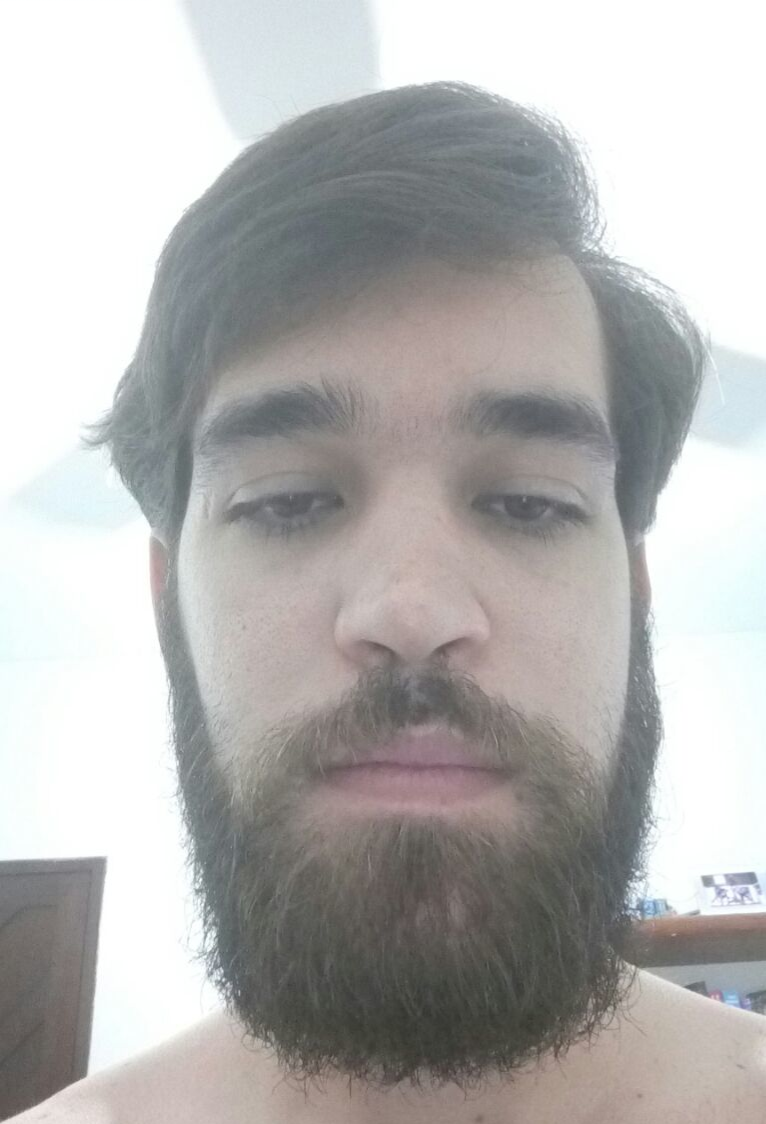

In [14]:
from itertools import chain
from PIL import Image

def ascii_to_bin(string):
    bin = ''
    for letra in string:
        bin = bin + format(ord(letra), 'b').zfill(8)
    return bin

def bin_to_ascii(str_bin):
    string = ''
    for byte in str_bin:
        string = string + chr(int(byte, 2))
    return string

segredo = 'Processamento Digital de Imagens para curiosos com Marcel Ribeiro Dantas :-)'
bsegredo = ascii_to_bin(segredo)
frase = ''

imagem = Image.open('barba_pentada.png')
vetor_pixels = list(imagem.getdata())

L = list(chain.from_iterable(vetor_pixels))

# Escondendo..
for canal in range(len(bsegredo)):
    if bsegredo[canal] == '0':  # par
        if L[canal]%2:
            if L[canal] > 0:
                L[canal] = L[canal] - 1
            else:
                L[canal] = L[canal] + 1
    else:       
        # impar
        if not(L[canal]%2):
            if L[canal] > 0:
                L[canal] = L[canal] - 1
            else:
                L[canal] = L[canal] + 1

vetor_pixels = [(L[i], L[i+1], L[i+2], L[i+3]) for i in xrange(0, len(L), 4)]
imagem.putdata(vetor_pixels)
imagem.save("barba_pentada_msg.png")
from IPython.display import Image
Image(filename='barba_pentada_msg.png') 

Como esperado, sequer notamos diferença na imagem se compararmos com a original. O código abaixo faz o processo inverso, capturando os bits menos significativos (com nossa ligeira modificação do processo, já explicada no processo anterior acima) e recuperando nossa mensagem.

# Encontrando texto escondido em um imagem RGBA

In [20]:
from PIL import Image
from itertools import chain

def ascii_to_bin(string):
    bin = ''
    for letra in string:
        bin = bin + format(ord(letra), 'b').zfill(8)
    return bin

def bin_to_ascii(str_bin):
    string = ''
    for byte in str_bin:
        string = string + chr(int(byte, 2))
    return string

frase = ''

imagem = Image.open('barba_pentada_msg.png')
vetor_pixels = list(imagem.getdata())
size = imagem.height * imagem.width

L = list(chain.from_iterable(vetor_pixels))

# Lendo
for canal in range(size):
    if L[canal]%2:
        frase = frase + '1'
    else:
        frase = frase + '0'

b = list(frase)
frase = [(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4] + b[i+5] + b[i+6] + b[i+7]) for i in xrange(0, size, 8)]
print bin_to_ascii(frase)

Processamento Digital de Imagens para curiosos com Marcel Ribeiro Dantas :-)��������3�==5[[U��[Uwwww�wyw[[U�����U[�U��[���[UUU[UU��[[UU��[UU�UU��U�Y�[[7��s�w�sUUU��U�SUUu��U��ww���;�U��������3��w���������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������3�==;[U[[���wwww�wywU�[���U�U[�UU�U[��[UUU[U�U���[�[U��[U��[y��Y��U�7��y��wsUU���U���[[[�U��wyq���;�U��������3��w���������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������3�==۵U����]wwww�wyw�U�[��[�U[���[�U���[�U[U[U�U��U�U[UUU��U�U[���UUywyy��w�U�UU[Uu[[�W[�U���w�_�����;UU��������3��w�����������������������������������

**Links recomendados**:

http://pt.slideshare.net/UttamJain/steganography-14902856 (slides) <br>
http://robertgawron.blogspot.com.br/2011/07/how-to-hide-image-inside-anther-image.html (Escondendo uma imagem dentro de outra)




Lembra da charada no início deste documento?
<br>

<center>**Since everyone can read, encoding text in neutral sentences is doubtfully effective**</center>
<br>

<center><font color="red">S</font>ince <font color="red">e</font>veryone <font color="red">c</font>an <font color="red">r</font>ead, <font color="red">e</font>ncoding <font color="red">t</font>ext <font color="red">i</font>n <font color="red">n</font>eutral <font color="red">s</font>entences <font color="red">i</font>s <font color="red">d</font>oubtfully <font color="red">e</font>ffective</center>
<br>

<center><font color="red"><font color="red">Secret inside</font></font></center>